In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 


from helpers import *

In [3]:
# directories
data_dir = "/global/home/users/rrmastandrea/FETA/LHCO_0sig_f/data/"
# load in the reverse rescales
path_to_minmax = "/global/home/users/rrmastandrea/FETA/LHCO_STS/data/col_minmax.npy"
col_minmax = np.load(path_to_minmax)


num_features = 5


# dataset generation parameters
context_endpoints = (2500, 4500)

bands_dict = {"ob1": [2500, 2900],
              "sb1": [2900, 3300],
              "sr" : [3300, 3700],
              "sb2": [3700, 4100],
              "ob2": [4100, 4500]}


In [4]:
"""
"""
"""
LOAD IN THE DATASETS AND PROCESS
"""
"""
"""

npull_dataset_train_sim = ToyDataset(data_dir, "train_sim.npy")
npull_dataset_val_sim = ToyDataset(data_dir, "val_sim.npy")
npull_dataset_train_dat = ToyDataset(data_dir, "train_dat.npy")
npull_dataset_val_dat = ToyDataset(data_dir, "val_dat.npy")

print("Num SIM events in SB:", len(npull_dataset_train_sim)+len(npull_dataset_val_sim))
print("Num DAT events in SB:", len(npull_dataset_train_dat)+len(npull_dataset_val_dat))
print()

# Preprocess the data
print("Preproccessing data...")
print()
dataset_train_sim = npull_dataset_train_sim.pull_from_mass_range([bands_dict["sb1"], bands_dict["sr"], bands_dict["sb2"]])
dataset_val_sim = npull_dataset_val_sim.pull_from_mass_range([bands_dict["sb1"], bands_dict["sr"], bands_dict["sb2"]])
dataset_train_dat = npull_dataset_train_dat.pull_from_mass_range([bands_dict["sb1"], bands_dict["sb2"]])
dataset_val_dat = npull_dataset_val_dat.pull_from_mass_range([bands_dict["sb1"], bands_dict["sb2"]])

dataset_train_sim = minmaxscale(dataset_train_sim.data, col_minmax, lower = -3, upper = 3, forward = True)
dataset_val_sim = minmaxscale(dataset_val_sim.data, col_minmax, lower = -3, upper = 3, forward = True)
dataset_train_dat = minmaxscale(dataset_train_dat.data, col_minmax, lower = -3, upper = 3, forward = True)
dataset_val_dat = minmaxscale(dataset_val_dat.data, col_minmax, lower = -3, upper = 3, forward = True)


Num SIM events in SB: 401354
Num DAT events in SB: 278761

Preproccessing data...



(321083, 6)
(80271, 6)
(223008, 6)
(55753, 6)


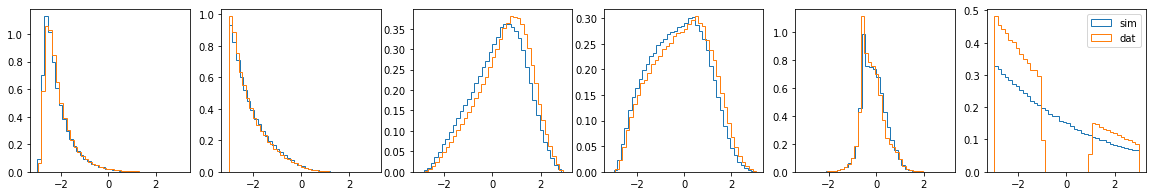

In [5]:
print(dataset_train_sim.shape)
print(dataset_val_sim.shape)
print(dataset_train_dat.shape)
print(dataset_val_dat.shape)

fig, ax = plt.subplots(1, 6, figsize = (20,3))

for i in range(6):
    ax[i].hist(dataset_train_sim[:,i], bins = 40, histtype = "step", density = True, label = "sim")
    ax[i].hist(dataset_train_dat[:,i], bins = 40, histtype = "step", density = True, label = "dat")
plt.legend()
plt.show()


In [6]:
# save data out

np.save("LHCO_data/train_sim_data.npy", dataset_train_sim[:,:5])
np.save("LHCO_data/val_sim_data.npy", dataset_val_sim[:,:5])
np.save("LHCO_data/train_dat_data.npy", dataset_train_dat[:,:5])
np.save("LHCO_data/val_dat_data.npy", dataset_val_dat[:,:5])

np.save("LHCO_data/train_sim_cont.npy", dataset_train_sim[:,5])
np.save("LHCO_data/val_sim_cont.npy", dataset_val_sim[:,5])
np.save("LHCO_data/train_dat_cont.npy", dataset_train_dat[:,5])
np.save("LHCO_data/val_dat_cont.npy", dataset_val_dat[:,5])
